# Implementation and run with U-Net architecture

In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
import os
import matplotlib.image as mpimg
import cv2

In [3]:
import unet

/Users/ondine/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
saving_path = TOSET!!!! #'secondGreatResults/'

In [6]:
def rotate_img(img, angle, rgb):
    rows, cols = img.shape[0:2]
    if rgb:
        id = 1
    else:
        id = 0
    rot_M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, id)
    return cv2.warpAffine(img, rot_M, (cols, rows))

In [7]:
def flip_img(img, border_id):
    return cv2.flip(img, border_id)

In [8]:
def extract_data(filename, num_images, augmentation=False, train=False):
    """Extract the images into a 4D tensor [image index, y, x, channels].
    Values are rescaled from [0, 255] down to [-0.5, 0.5].
    """
    print('Extracting data...')
    imgs = []
    for i in range(1, num_images+1):
        if i%10==0:
            print('Extract original images... i=',i)
        if train:
            imageid = "satImage_%.3d" % i
        else:
            imageid = "test_%.1d" % i  + "/test_%.1d" % i
        image_filename = filename + imageid + ".png"
        if os.path.isfile(image_filename):
            #print ('Loading ' + image_filename)
            img = mpimg.imread(image_filename)
            imgs.append(img)
            
            if augmentation:
                img_cv2 = cv2.imread(image_filename)
                img_flip = np.flip(flip_img(img_cv2, 1),2)/255
                imgs.append(img_flip)

                imgs.append(np.flip(rotate_img(img_cv2, 90, True),2)/255)
                imgs.append(np.flip(rotate_img(img_cv2, 180, True),2)/255)
                imgs.append(np.flip(rotate_img(img_cv2, 270, True),2)/255)

                if i==2:
                    plt.subplot(151),plt.imshow(img),plt.title('Input')
                    plt.subplot(152),plt.imshow(np.flip(rotate_img(img_cv2, 90, True),2)/255),plt.title('Output')
                    plt.subplot(153),plt.imshow(np.flip(rotate_img(img_cv2, 180, True),2)/255),plt.title('Output')
                    plt.subplot(154),plt.imshow(np.flip(rotate_img(img_cv2, 270, True),2)/255),plt.title('Output')
                    plt.subplot(155),plt.imshow(img_flip),plt.title('Output')
                    plt.show()
            
        else:
            print ('File ' + image_filename + ' does not exist')
    
    img_size = imgs[0].shape[0]
    img_height = imgs[0].shape[1]
    if img_size != img_height:
        print('Error!! The images should have their height equal to their width.')

    return np.asarray(imgs).astype(np.float32)

In [9]:
# Assign a label to a patch v
def value_to_class(v):
    # you can remark the hot encoding
    foreground_threshold = 0.25 # percentage of pixels > 1 required to assign a foreground label to a patch TODOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
    df = np.sum(v)
    if df > foreground_threshold:
        return [0, 1]
    else:
        return [1, 0]

In [10]:
# Extract label images
def extract_labels(filename, num_images, augmentation=False):
    """Extract the labels into a 1-hot matrix [image index, label index]."""
    print('Extracting labels...')
    gt_imgs = []
    for i in range(1, num_images+1):
        if i%10==0:
            print('Extract groundtruth images... i=',i)
        imageid = "satImage_%.3d" % i
        image_filename = filename + imageid + ".png"
        if os.path.isfile(image_filename):
            #print ('Loading ' + image_filename)
            img = mpimg.imread(image_filename)
            gt_imgs.append(img)
            
            if augmentation:
                img_cv2 = cv2.imread(image_filename,0)
                gt_img_flip = flip_img(img_cv2, 1)/255
                gt_imgs.append(gt_img_flip)

                gt_imgs.append(rotate_img(img_cv2, 90, True)/255)
                gt_imgs.append(rotate_img(img_cv2, 180, True)/255)
                gt_imgs.append(rotate_img(img_cv2, 270, True)/255)

                if i==2:
                    plt.subplot(151),plt.imshow(img),plt.title('Input')
                    plt.subplot(152),plt.imshow(rotate_img(img_cv2, 90, True)/255),plt.title('Output')
                    plt.subplot(153),plt.imshow(rotate_img(img_cv2, 180, True)/255),plt.title('Output')
                    plt.subplot(154),plt.imshow(rotate_img(img_cv2, 270, True)/255),plt.title('Output')
                    plt.subplot(155),plt.imshow(gt_img_flip),plt.title('Output')
                    plt.show()
            
        else:
            print ('File ' + image_filename + ' does not exist')

    data = np.asarray(gt_imgs)
    out_lab = [[[value_to_class(data[i][j][k]) \
                 for k in range(data.shape[2])] \
                for j in range(data.shape[1])] \
               for i in range(data.shape[0])]

    # Convert to dense 1-hot representation.
    return np.asarray(out_lab).astype(np.float32)

In [11]:
########### define directory of the training images ############################
data_dir = '../training/'
train_data_filename = data_dir + 'images/'
train_labels_filename = data_dir + 'groundtruth/'
augmentation = False
TRAINING_SIZE = 100

data = extract_data(train_data_filename, TRAINING_SIZE, augmentation=augmentation, train=True)
labels = extract_labels(train_labels_filename, TRAINING_SIZE, augmentation=augmentation)

Extracting data...
Extract original images... i= 10
Extract original images... i= 20
Extract original images... i= 30
Extract original images... i= 40
Extract original images... i= 50
Extract original images... i= 60
Extract original images... i= 70
Extract original images... i= 80
Extract original images... i= 90
Extract original images... i= 100
Extracting labels...
Extract groundtruth images... i= 10
Extract groundtruth images... i= 20
Extract groundtruth images... i= 30
Extract groundtruth images... i= 40
Extract groundtruth images... i= 50
Extract groundtruth images... i= 60
Extract groundtruth images... i= 70
Extract groundtruth images... i= 80
Extract groundtruth images... i= 90
Extract groundtruth images... i= 100


In [12]:
if augmentation:
    initial_data = data[range(0,data.shape[0],5)]
    initial_labels = labels[range(0,data.shape[0],5)]
else:
    initial_data = data
    initial_labels = labels

In [13]:
print(data.shape)
print(labels.shape)
print(initial_data.shape)
print(initial_labels.shape)

(100, 400, 400, 3)
(100, 400, 400, 2)
(100, 400, 400, 3)
(100, 400, 400, 2)


In [14]:
net = unet.Unet(channels=3, n_class=2, layers=5, features_root=4) 
    #, cost_kwargs={'regularizer':1e-4}) # class_weights

2017-12-14 09:35:31,335 Layers 5, features 4, filter size 3x3, pool size: 2x2


In [15]:
# Optimizer = "momentum" or "adam"
trainer = unet.Trainer(net, batch_size=16, optimizer="adam")  # 16
    #, opt_kwargs=dict(momentum=0.2)), learning_rate, decay_rate

In [16]:
path = trainer.train(data=data, labels=labels, output_path="./unet_trained/"+saving_path, training_iters=20, \
                     epochs=50, dropout=1.0, display_step=5, prediction_path='prediction') # 20, 20

2017-12-14 09:36:03,516 Removing '/Users/ondine/Documents/phd/Cours/LMO_ML/project2/project_Ondine/unet/prediction'
2017-12-14 09:36:03,518 Removing '/Users/ondine/Documents/phd/Cours/LMO_ML/project2/project_Ondine/unet/unet_trained/secondGreatResults'
2017-12-14 09:36:03,520 Allocating '/Users/ondine/Documents/phd/Cours/LMO_ML/project2/project_Ondine/unet/prediction'
2017-12-14 09:36:03,521 Allocating '/Users/ondine/Documents/phd/Cours/LMO_ML/project2/project_Ondine/unet/unet_trained/secondGreatResults'
2017-12-14 09:36:22,159 Verification error= 31.5%, loss= 0.7264
2017-12-14 09:36:29,331 Start optimization
2017-12-14 09:36:36,359 Iter 0, Minibatch Loss= 0.6893, Training Accuracy= 0.7935, Minibatch error= 20.6%
2017-12-14 09:37:02,723 Iter 5, Minibatch Loss= 0.6883, Training Accuracy= 0.8006, Minibatch error= 19.9%
2017-12-14 09:37:29,358 Iter 10, Minibatch Loss= 0.6716, Training Accuracy= 0.7999, Minibatch error= 20.0%
2017-12-14 09:37:56,786 Iter 15, Minibatch Loss= 0.6678, Trainin

2017-12-14 10:06:07,597 Iter 270, Minibatch Loss= 0.3197, Training Accuracy= 0.7936, Minibatch error= 20.6%
2017-12-14 10:06:34,629 Iter 275, Minibatch Loss= 0.3475, Training Accuracy= 0.7939, Minibatch error= 20.6%
2017-12-14 10:06:54,751 Epoch 13, Average loss: 0.2971, learning rate: 0.0010
2017-12-14 10:07:12,087 Verification error= 20.5%, loss= 0.2844
2017-12-14 10:07:30,006 Iter 280, Minibatch Loss= 0.2986, Training Accuracy= 0.7926, Minibatch error= 20.7%
2017-12-14 10:07:56,515 Iter 285, Minibatch Loss= 0.3000, Training Accuracy= 0.7858, Minibatch error= 21.4%
2017-12-14 10:08:23,002 Iter 290, Minibatch Loss= 0.3024, Training Accuracy= 0.7882, Minibatch error= 21.2%
2017-12-14 10:08:49,231 Iter 295, Minibatch Loss= 0.2952, Training Accuracy= 0.7838, Minibatch error= 21.6%
2017-12-14 10:09:08,815 Epoch 14, Average loss: 0.2777, learning rate: 0.0010
2017-12-14 10:09:26,037 Verification error= 20.5%, loss= 0.2801
2017-12-14 10:09:43,950 Iter 300, Minibatch Loss= 0.2845, Training A

2017-12-14 10:38:42,529 Epoch 27, Average loss: 0.1986, learning rate: 0.0010
2017-12-14 10:38:59,901 Verification error= 20.5%, loss= 0.1998
2017-12-14 10:39:21,796 Iter 560, Minibatch Loss= 0.1991, Training Accuracy= 0.7972, Minibatch error= 20.3%
2017-12-14 10:39:48,036 Iter 565, Minibatch Loss= 0.1900, Training Accuracy= 0.7994, Minibatch error= 20.1%
2017-12-14 10:40:14,241 Iter 570, Minibatch Loss= 0.1794, Training Accuracy= 0.8126, Minibatch error= 18.7%
2017-12-14 10:40:40,505 Iter 575, Minibatch Loss= 0.1716, Training Accuracy= 0.8291, Minibatch error= 17.1%
2017-12-14 10:40:59,987 Epoch 28, Average loss: 0.1981, learning rate: 0.0010
2017-12-14 10:41:17,117 Verification error= 20.5%, loss= 0.1895
2017-12-14 10:41:39,206 Iter 580, Minibatch Loss= 0.2183, Training Accuracy= 0.7680, Minibatch error= 23.2%
2017-12-14 10:42:05,381 Iter 585, Minibatch Loss= 0.1940, Training Accuracy= 0.7914, Minibatch error= 20.9%
2017-12-14 10:42:31,657 Iter 590, Minibatch Loss= 0.1768, Training A

2017-12-14 11:12:35,069 Iter 845, Minibatch Loss= 0.1822, Training Accuracy= 0.7979, Minibatch error= 20.2%
2017-12-14 11:13:01,327 Iter 850, Minibatch Loss= 0.1825, Training Accuracy= 0.7881, Minibatch error= 21.2%
2017-12-14 11:13:27,649 Iter 855, Minibatch Loss= 0.1878, Training Accuracy= 0.7751, Minibatch error= 22.5%
2017-12-14 11:13:47,210 Epoch 42, Average loss: 0.1711, learning rate: 0.0010
2017-12-14 11:14:06,561 Verification error= 20.5%, loss= 0.1707
2017-12-14 11:14:33,408 Iter 860, Minibatch Loss= 0.1627, Training Accuracy= 0.7993, Minibatch error= 20.1%
2017-12-14 11:14:59,847 Iter 865, Minibatch Loss= 0.1608, Training Accuracy= 0.8023, Minibatch error= 19.8%
2017-12-14 11:15:26,023 Iter 870, Minibatch Loss= 0.1610, Training Accuracy= 0.8067, Minibatch error= 19.3%
2017-12-14 11:15:52,211 Iter 875, Minibatch Loss= 0.1571, Training Accuracy= 0.8074, Minibatch error= 19.2%
2017-12-14 11:16:11,714 Epoch 43, Average loss: 0.1695, learning rate: 0.0010
2017-12-14 11:16:28,887 

In [17]:
prediction = net.predict("./unet_trained/"+saving_path+"model.cpkt", initial_data)

INFO:tensorflow:Restoring parameters from ./unet_trained/secondGreatResults/model.cpkt


2017-12-14 11:31:35,251 Restoring parameters from ./unet_trained/secondGreatResults/model.cpkt
2017-12-14 11:31:36,011 Model restored from file: ./unet_trained/secondGreatResults/model.cpkt


In [18]:
print(initial_data.shape)
print(initial_labels.shape)
print(prediction.shape)

(100, 400, 400, 3)
(100, 400, 400, 2)
(100, 400, 400, 2)


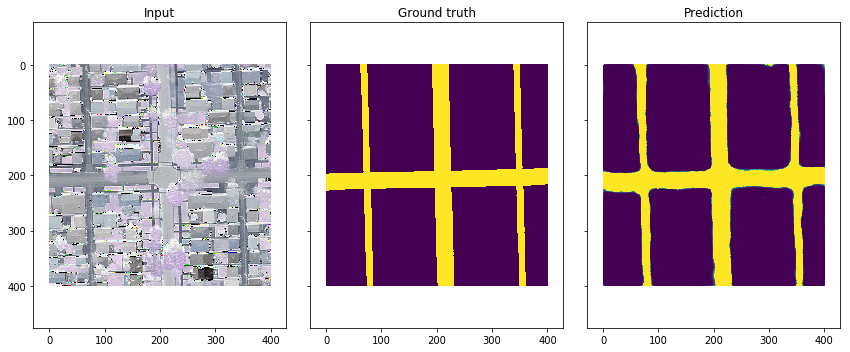

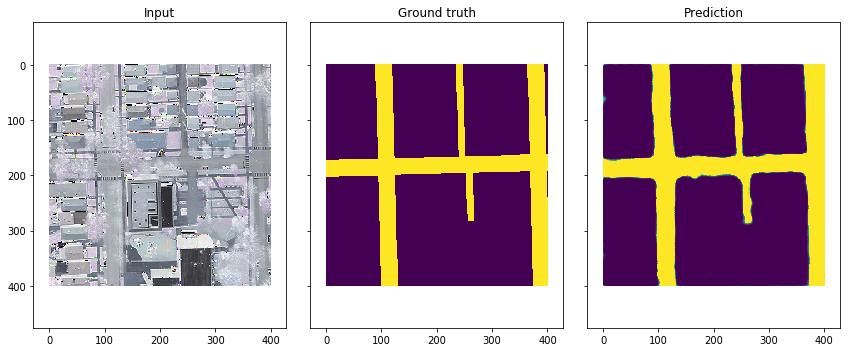

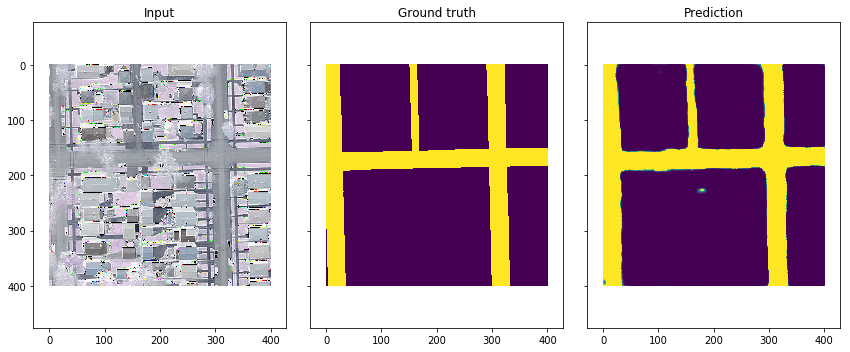

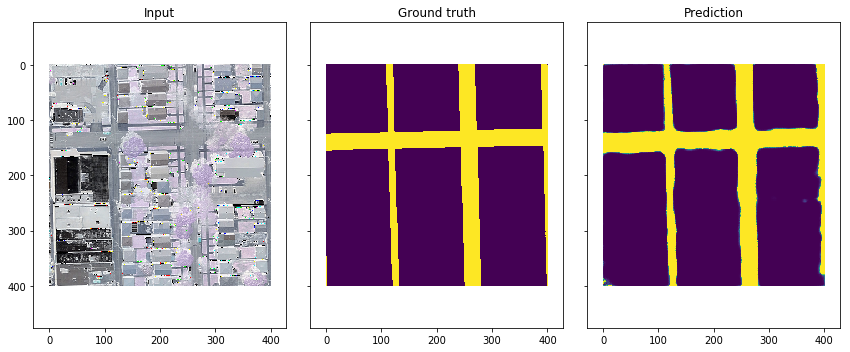

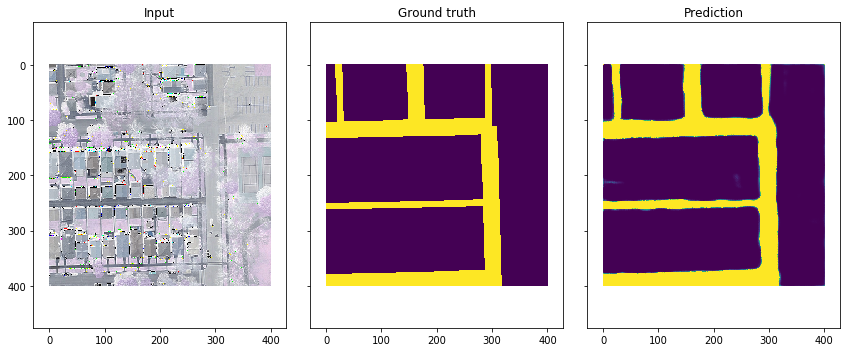

In [19]:
id_end = 5
for num in range(0,id_end):
    fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
    ax[0].imshow(initial_data[num])
    ax[1].imshow(initial_labels[num,:,:,1], aspect="auto")
    #mask = prediction[num,:,:,1] > 0.3
    #ax[2].imshow(mask, aspect="auto")
    ax[2].imshow(prediction[num,:,:,1], aspect="auto")
    ax[0].set_title("Input")
    ax[1].set_title("Ground truth")
    ax[2].set_title("Prediction")
    fig.tight_layout()
    fig.savefig("output/roadSegmentation.png")

In [20]:
train_data_dir = '../test_set_images/'
TESTING_SIZE = 5

test_data = extract_data(train_data_dir, TESTING_SIZE, train=False)
print(test_data.shape)

Extracting data...
(5, 608, 608, 3)


In [21]:
test_prediction = net.predict("./unet_trained/"+saving_path+"model.cpkt", test_data)

INFO:tensorflow:Restoring parameters from ./unet_trained/secondGreatResults/model.cpkt


2017-12-14 11:32:35,863 Restoring parameters from ./unet_trained/secondGreatResults/model.cpkt
2017-12-14 11:32:36,647 Model restored from file: ./unet_trained/secondGreatResults/model.cpkt


In [22]:
print(test_data[num].shape)

(608, 608, 3)


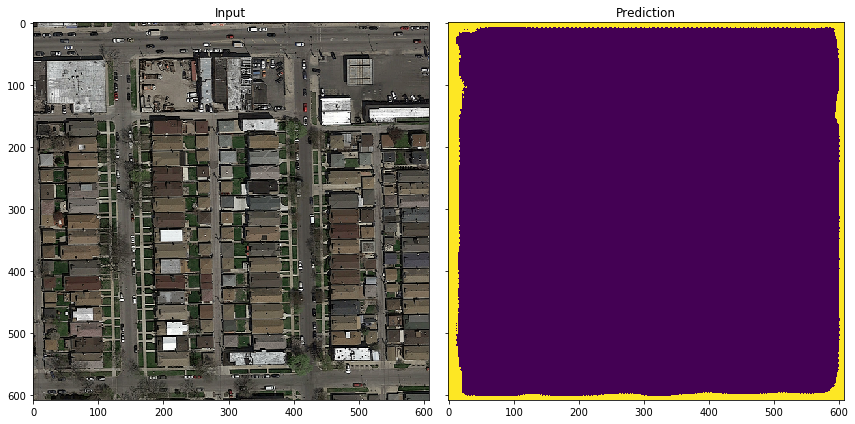

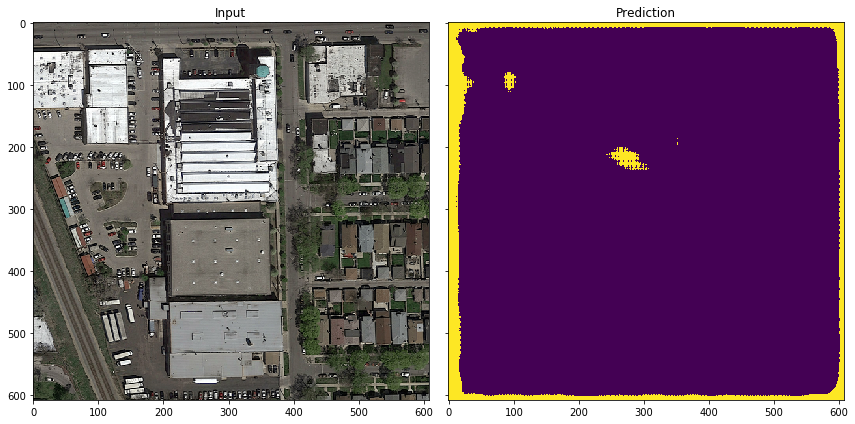

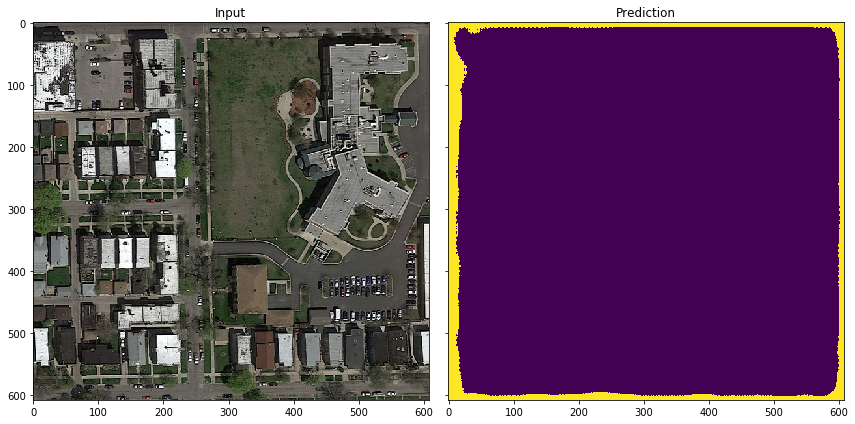

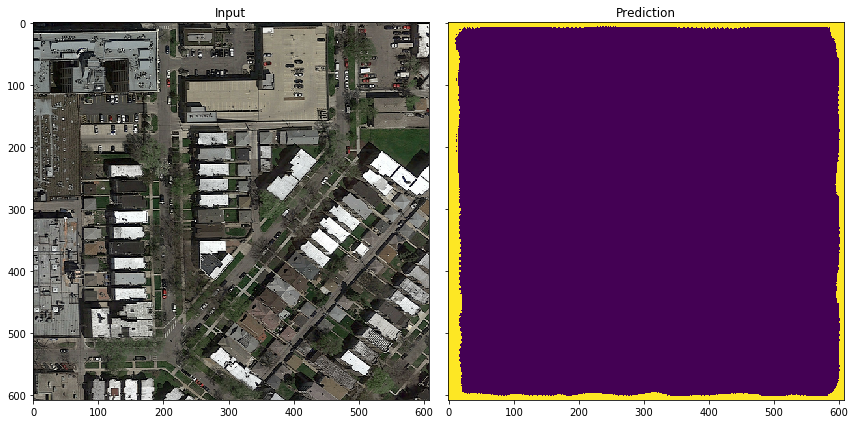

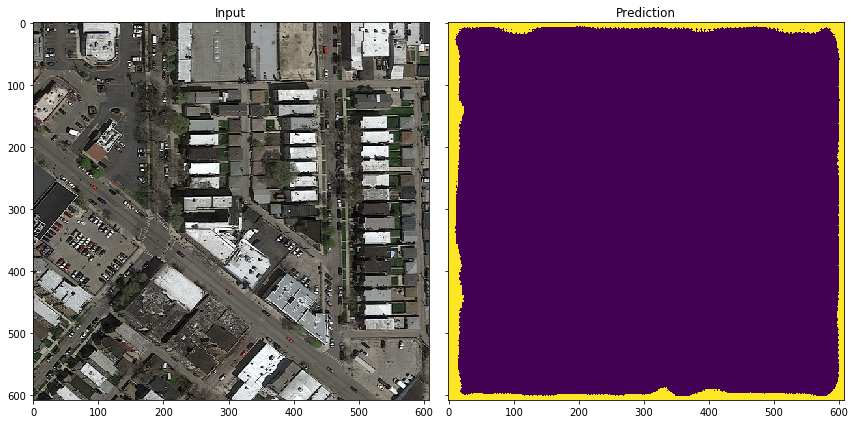

In [25]:
for num in range(0,TESTING_SIZE):
    fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12,6))
    ax[0].imshow(test_data[num], aspect="auto")
    mask = test_prediction[num,:,:,1] > 0.01
    ax[1].imshow(mask, aspect="auto")
    #ax[1].imshow(test_prediction[num,:,:,1], aspect="auto")
    ax[0].set_title("Input")
    ax[1].set_title("Prediction")
    fig.tight_layout()
    fig.savefig("output/roadSegmentation.png")